In [10]:
import seaborn as sns
sns.set_style('white')
flatui = ['#3498db', '#a6901b', '#e8a6ca','#a2b4c5', '#2ecc71', 
          '#d40b51', '#543cee']
sns.set_palette(flatui)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('/home/jevjev/Dropbox/Projects/Intrinsic-dimensionality/')
from src.utils.train import get_exponential_range
from sklearn.metrics import auc

In [11]:
dims = np.array(list(get_exponential_range()))
print(len(dims))
x = [0, 10000, 20000, 30000, 40000, 50000]
y = [0.4, 0.5, 0.6, 0.7, 0.8]
for i, dim in enumerate(dims):
    print(i, ' ', dim)

15
0   100
1   200
2   300
3   400
4   500
5   1000
6   2000
7   3000
8   4000
9   5000
10   10000
11   20000
12   30000
13   40000
14   50000


In [12]:
cifar = np.array([17.52, 17.96, 21.24, 22.48, 24.05, 28.78,
               34.58, 39.47, 41.86, 45.17, 48.51, 58.26, 
                  61.37, 65.47, 66.4])
print(len(cifar))
breast = np.array([52.12, 51.07, 52.45, 53.22, 51.95, 53.35, 
                  52.5, 53.4, 53.25, 53.05, 55.49, 
                  60.76, 68.31, 70.9, 74.16])
print(len(breast))
colon = np.array([46.69, 55.47, 57.2, 60.87, 61.65, 62.52, 
                  66.96, 67.25, 69.49, 72.64, 75.54, 
                  76.96, 79.45, 83.6, 86.2])
print(len(colon))
lymphoma = np.array([46.61, 48.79, 48.27, 49.27, 50.23, 52.58, 
                     49.94, 59.8, 54.41, 64.85, 68.07, 70.64, 
                     76.17, 76.51, 77.91])
print(len(lymphoma))
cifar100 = np.array([01.64, 01.84, 03.42, 04.19, 07.02, 10.35, 
                     12.55, 14.51, 15.38, 20.62, 27.52, 
                     31.07, 34.24, 40.91, 45.77])
print(len(cifar100))
df = pd.DataFrame({'Dimension': dims,
                  'Cifar10': cifar,
                  'Cifar100': cifar100,
                  'Breast': breast,
                  'Colon': colon,
                  'Lymphoma': lymphoma,
                  }, index=None)
df[['Cifar10', 'Cifar100', 'Breast', 'Colon', 'Lymphoma']] = df[['Cifar10', 'Cifar100', 'Breast', 'Colon', 'Lymphoma']] / 100

15
15
15
15
15


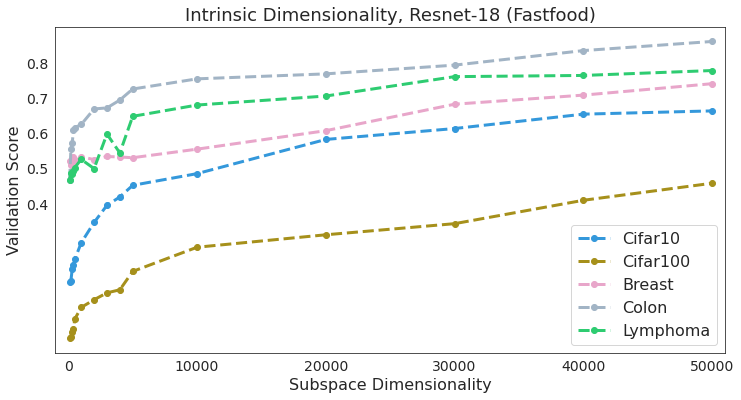

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
for task in ['Cifar10', 'Cifar100', 'Breast', 'Colon', 'Lymphoma']:
    acc = df[task].values
    ax.plot(dims, acc, '--o', linewidth=3.0, label=task) #+' AUC: {:,.0f}'.format(auc(dims,acc)))
ax.set_xticks(x)
ax.set_xlim([-1000, x[-1]+1000])
# ax.set_ylim([np.min(acc)-0.02, 0.9])
ax.set_yticks(y)
ax.set_xlabel('Subspace Dimensionality')
ax.set_ylabel('Validation Score')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.title.set_text("Intrinsic Dimensionality, Resnet-18 (Fastfood)")
ax.title.set_size(18)
ax.title.set_size(18)
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
plt.legend(fontsize=16)
plt.savefig("multiple_datasets.png", dpi=400)